In [ ]:
import networkx as nx
from packaging import version
import sys

print("Python version:", sys.version)
print("networkx version:", nx.__version__)

# assert networkx version is greater or equal to 2.6
assert version.parse(nx.__version__) >= version.parse("3.0")

# assert python version is greater that 3.7
assert sys.version_info[0] == 3
assert sys.version_info[1] >= 7

# If working in colab mount the drive filesystem
if 'google.colab' in str(get_ipython()):
    print('Working in colab')

    from google.colab import drive
    drive.mount('/content/drive')
else:
    print("working locally")

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
networkx version: 3.2.1
Working in colab
Mounted at /content/drive


Question2:
(a): We use three networks from database FB100: Caltech36, MIT8, Johns Hopkins55, we plot three networks as the figures shown below, we can see that every network has a place where nodes gather, and then there are scattered individual nodes around it.

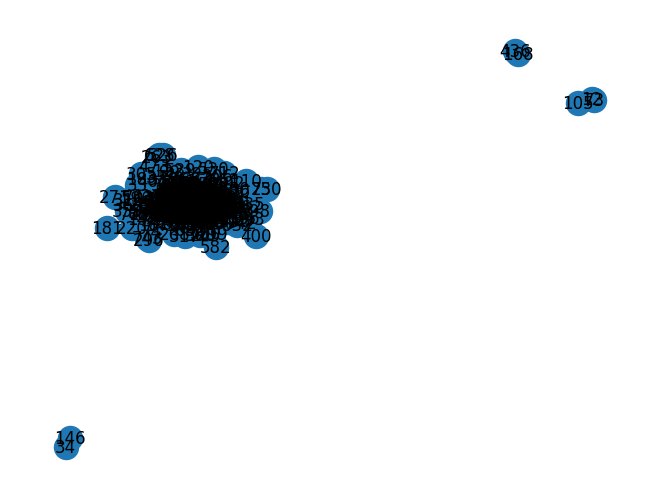

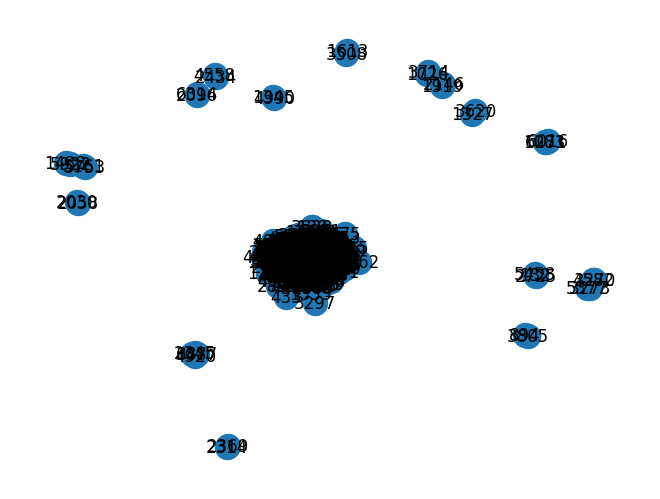

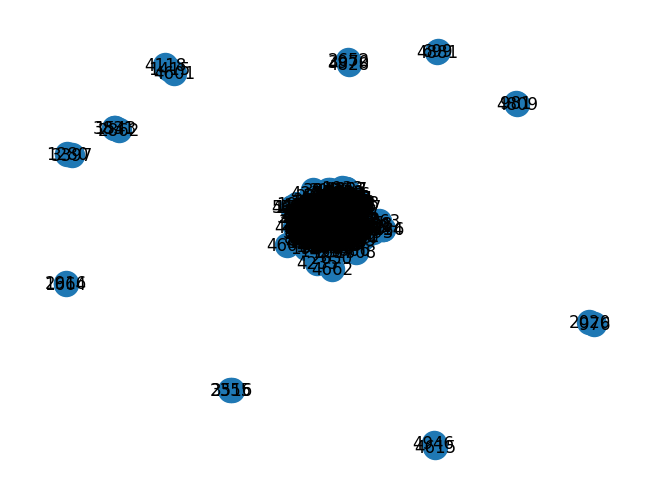

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.read_gml("/content/drive/MyDrive/fb100/data/Caltech36.gml")
nx.draw(G1, with_labels=True)
plt.show()

G2 = nx.read_gml("/content/drive/MyDrive/fb100/data/MIT8.gml")
nx.draw(G2, with_labels=True)
plt.show()

G3 = nx.read_gml("/content/drive/MyDrive/fb100/data/Johns Hopkins55.gml")
nx.draw(G3, with_labels=True)
plt.show()

In [ ]:
# Compute the Global Clustering Coefficient
global_clustering_coefficient = nx.transitivity(G1)
print("Global Clustering Coefficient of G1:", global_clustering_coefficient)

# Compute the Mean Local Clustering Coefficient
mean_local_clustering_coefficient = nx.average_clustering(G1)
print("Mean Local Clustering Coefficient of G1:", mean_local_clustering_coefficient)

# Compute the Edge Density
edge_density = nx.density(G1)
print("Edge Density of G1:", edge_density)

global_clustering_coefficient = nx.transitivity(G2)
print("Global Clustering Coefficient of G2:", global_clustering_coefficient)

mean_local_clustering_coefficient = nx.average_clustering(G2)
print("Mean Local Clustering Coefficient of G2:", mean_local_clustering_coefficient)

edge_density = nx.density(G2)
print("Edge Density of G2:", edge_density)

global_clustering_coefficient = nx.transitivity(G3)
print("Global Clustering Coefficient of G3:", global_clustering_coefficient)

mean_local_clustering_coefficient = nx.average_clustering(G3)
print("Mean Local Clustering Coefficient of G3:", mean_local_clustering_coefficient)

edge_density = nx.density(G3)
print("Edge Density of G3:", edge_density)

Global Clustering Coefficient of G1: 0.2912826901150874
Mean Local Clustering Coefficient of G1: 0.40929439048517247
Edge Density of G1: 0.05640442132639792
Global Clustering Coefficient of G2: 0.18028845093502427
Mean Local Clustering Coefficient of G2: 0.2712187419501315
Edge Density of G2: 0.012118119495041378
Global Clustering Coefficient of G3: 0.19316123901594015
Mean Local Clustering Coefficient of G3: 0.26839307371293525
Edge Density of G3: 0.013910200162372396


(b): As the code above, we can compute the Global Clustering Coefficient, Mean Loacl Clustering coefficient and edge density of each network. G1 is moderately sparse but more interconnected both locally and globally compared to G2 and G3. G2 and G3 are sparser with fewer local and global interconnections. This suggests that G1 might have more small-world properties (higher clustering with a moderate level of connectivity), while G2 and G3 are closer to random graphs or networks with more dispersed and less interconnected nodes.

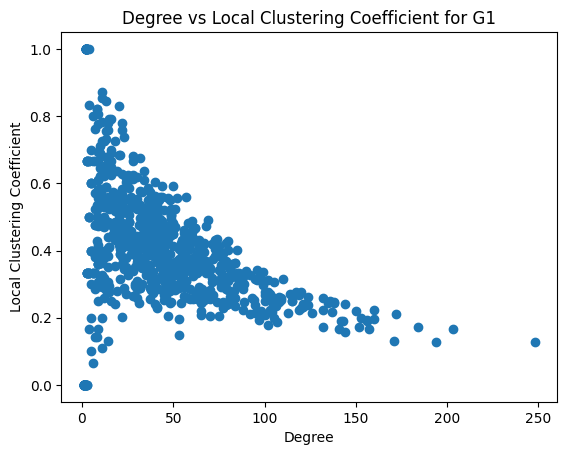

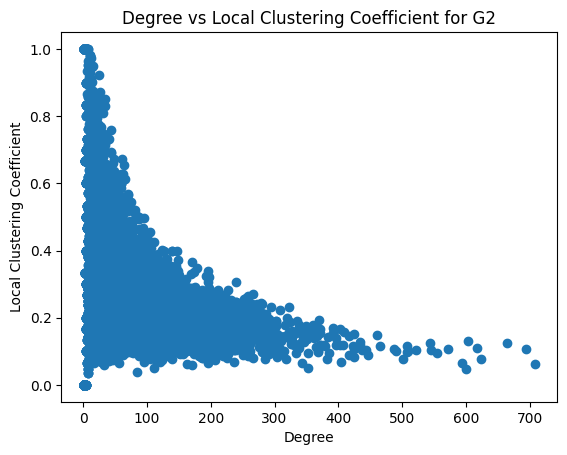

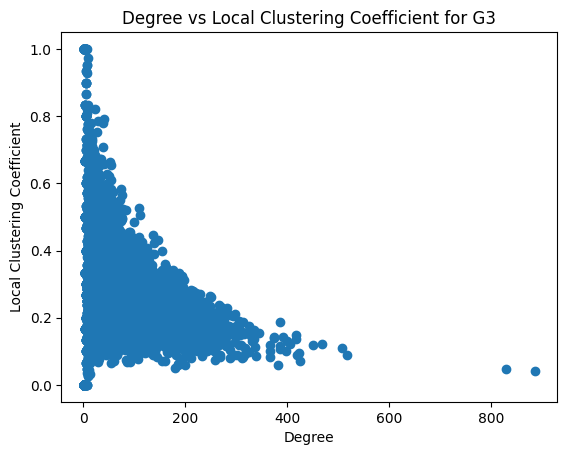

In [ ]:
def plot_degree_vs_clustering(G, title):
    degrees = dict(G.degree())
    clustering_coeffs = nx.clustering(G)

    plt.scatter(degrees.values(), clustering_coeffs.values())
    plt.xlabel('Degree')
    plt.ylabel('Local Clustering Coefficient')
    plt.title(title)
    plt.show()

plot_degree_vs_clustering(G1, 'Degree vs Local Clustering Coefficient for G1')
plot_degree_vs_clustering(G2, 'Degree vs Local Clustering Coefficient for G2')
plot_degree_vs_clustering(G3, 'Degree vs Local Clustering Coefficient for G3')

(c): From the code above, we can get three figures of the local clustering coefficient of three networks, G1 appears to be a more cohesive and interconnected network compared to G2 and G3. It potentially represents a small-world network with characteristics of high clustering and moderate connectivity. In contrast, G2 and G3, with their lower clustering coefficients and edge densities, suggest sparser and less cohesive networks, possibly indicative of random or other less interconnected network structures.

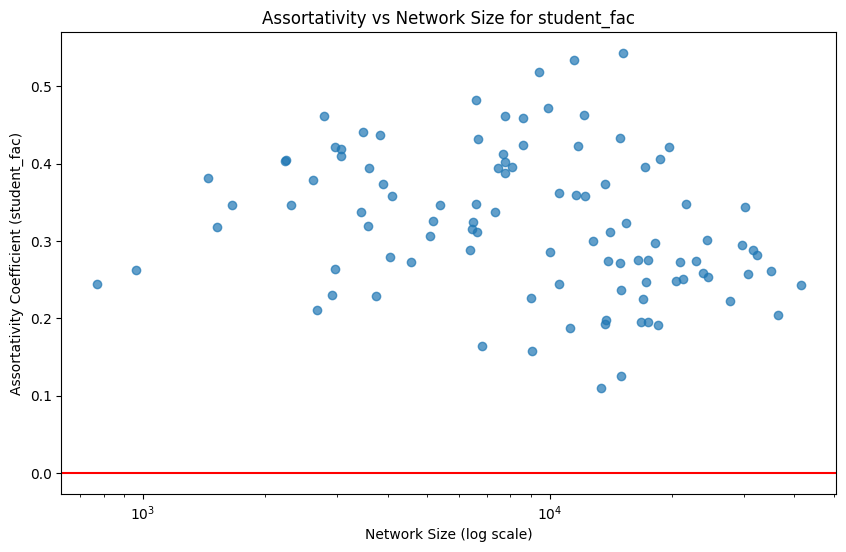

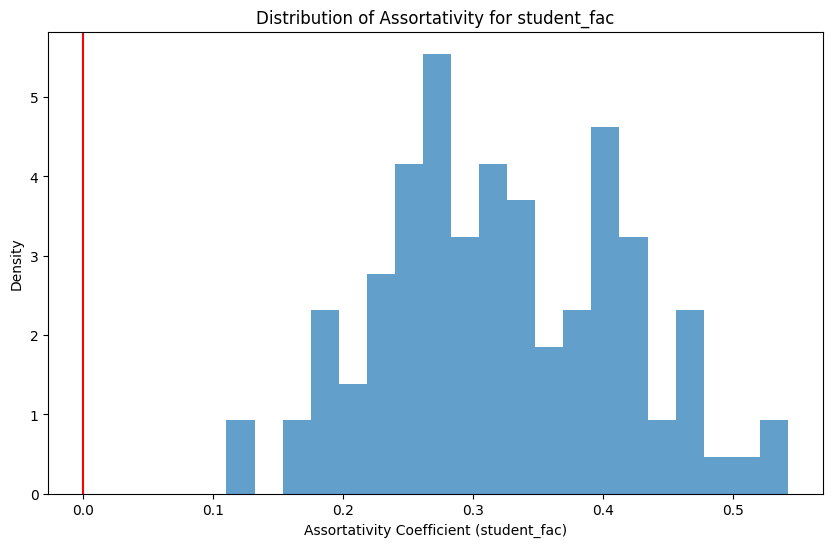

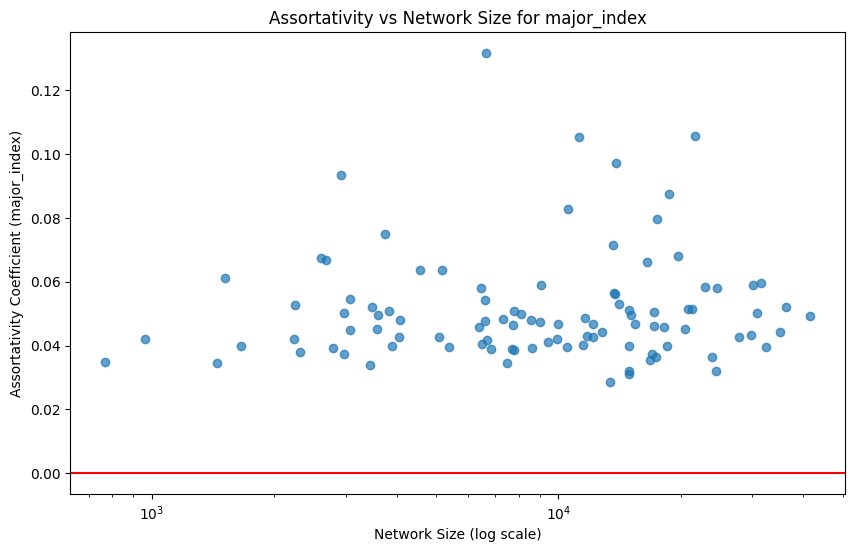

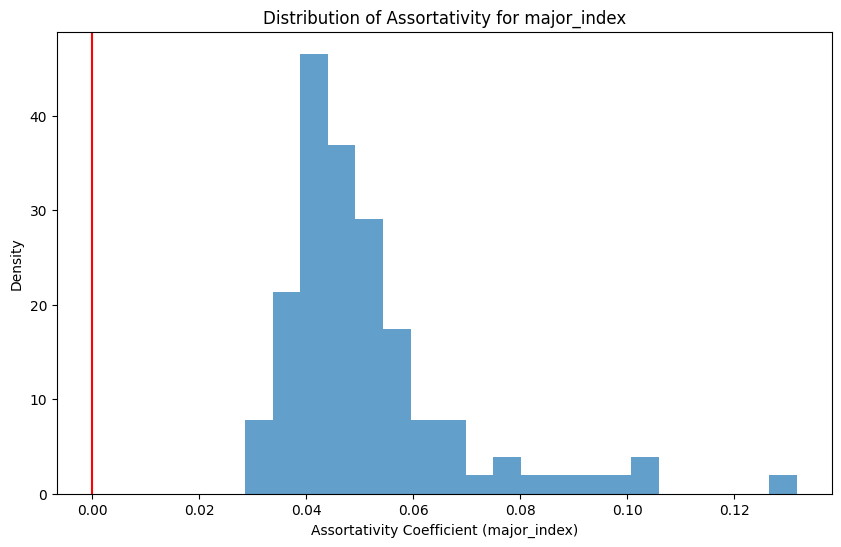

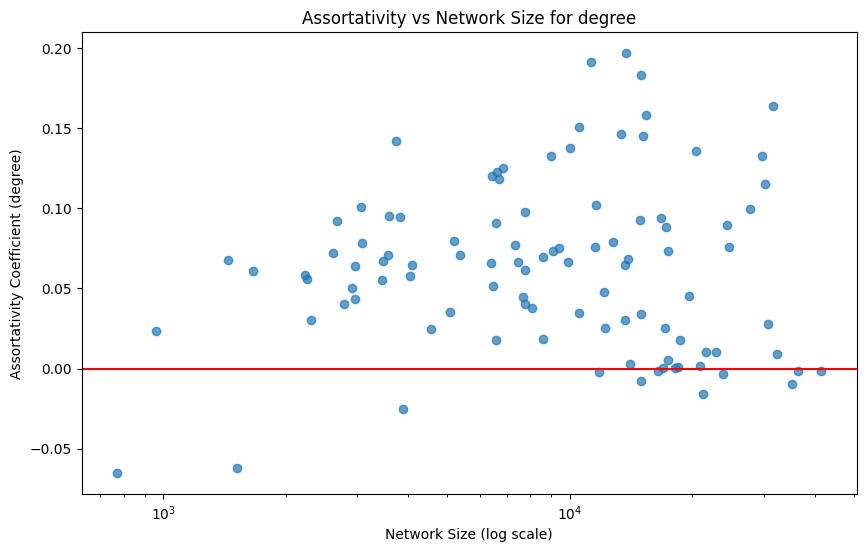

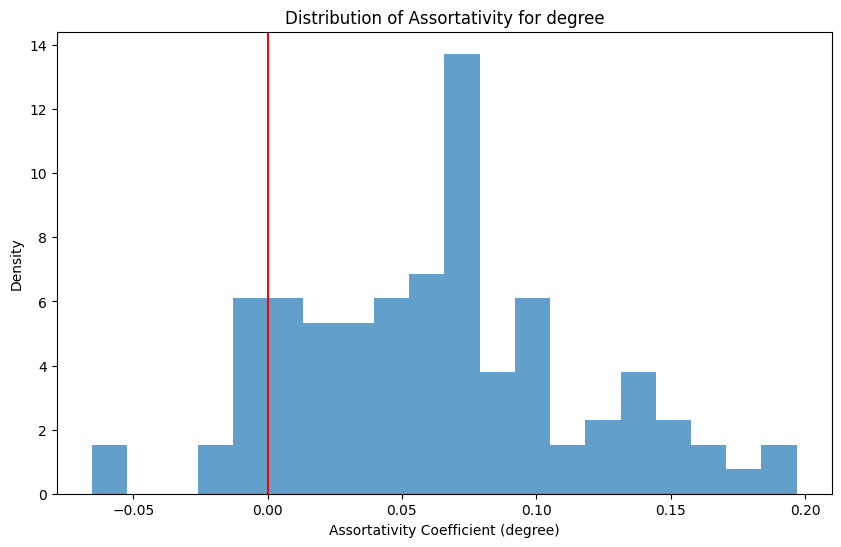

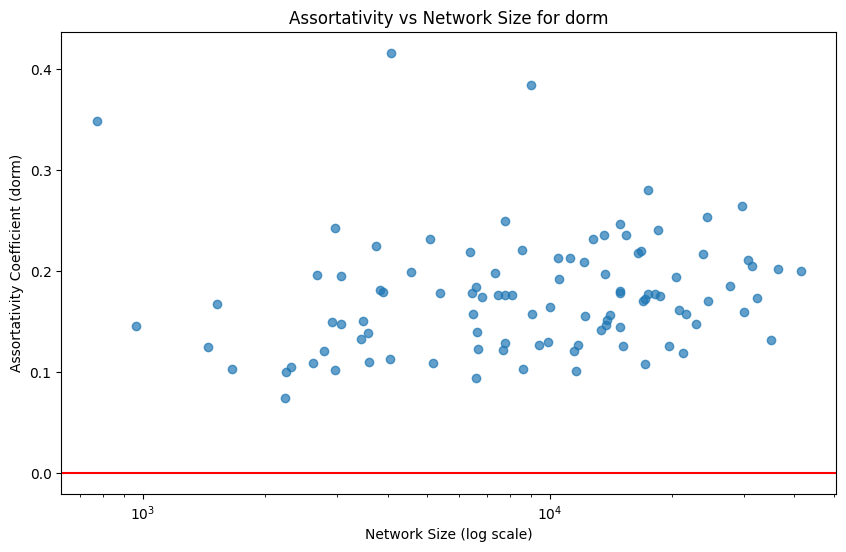

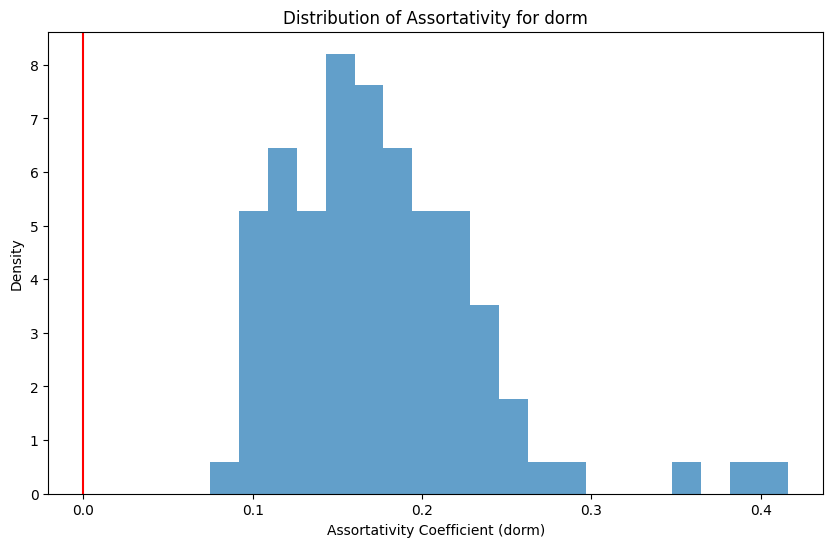

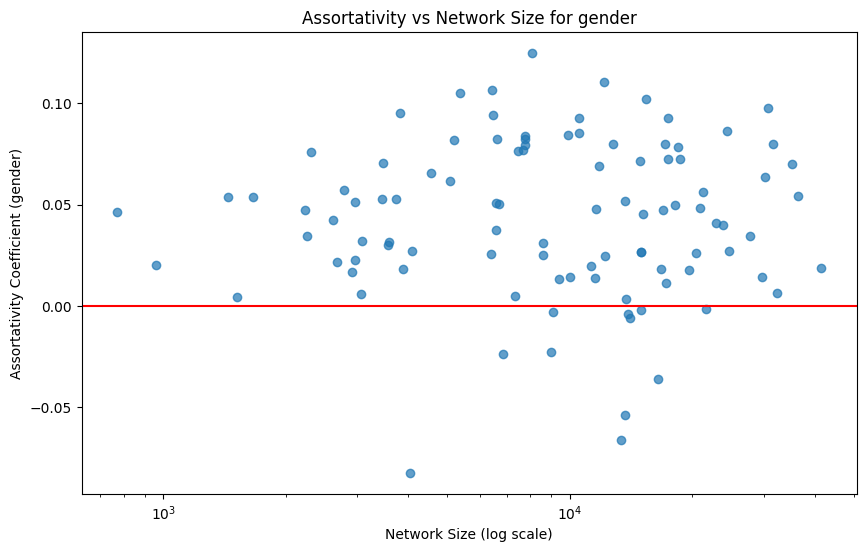

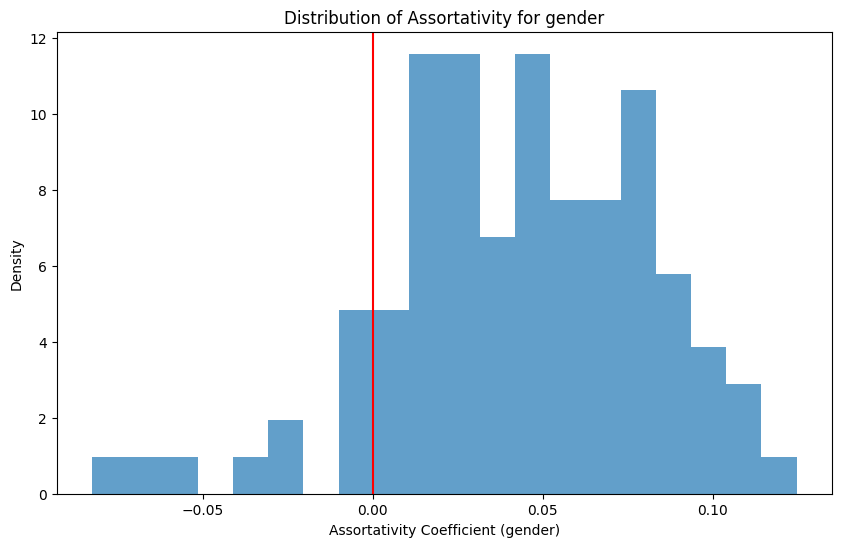

In [ ]:
import os
import numpy as np

directory_path = "/content/drive/MyDrive/fb100/data"

gml_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.gml')]

def load_network(gml_path):
    try:
        return nx.read_gml(gml_path)
    except Exception as e:
        print(f"An error occurred while loading {gml_path}: {e}")
        return None

attributes = ['student_fac', 'major_index', 'degree', 'dorm', 'gender']
assortativity_dict = {attr: [] for attr in attributes}
network_sizes = []

for gml_path in gml_files:
    G = load_network(gml_path)

    if G is None:
        continue

    G = nx.Graph(G)

    n = G.number_of_nodes()
    network_sizes.append(n)

    assortativity_dict['student_fac'].append(nx.attribute_assortativity_coefficient(G, 'student_fac'))
    assortativity_dict['major_index'].append(nx.attribute_assortativity_coefficient(G, 'major_index'))
    assortativity_dict['degree'].append(nx.degree_assortativity_coefficient(G))
    assortativity_dict['dorm'].append(nx.attribute_assortativity_coefficient(G, 'dorm'))
    assortativity_dict['gender'].append(nx.attribute_assortativity_coefficient(G, 'gender'))

for attr in attributes:
    plt.figure(figsize=(10, 6))
    plt.scatter(network_sizes, assortativity_dict[attr], alpha=0.7)
    plt.xscale('log')
    plt.xlabel('Network Size (log scale)')
    plt.ylabel(f'Assortativity Coefficient ({attr})')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title(f'Assortativity vs Network Size for {attr}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist(assortativity_dict[attr], bins=20, density=True, alpha=0.7)
    plt.xlabel(f'Assortativity Coefficient ({attr})')
    plt.ylabel('Density')
    plt.title(f'Distribution of Assortativity for {attr}')
    plt.axvline(x=0, color='r', linestyle='-')
    plt.show()

Question 3:

With the code, we can get the figures above, then analyzing the results, we can draw the following conclusions:  

Student/Faculty Status:

The scatter plot shows positive assortativity coefficients across various network sizes, indicating a tendency for students to connect with students and faculty with faculty. This is expected in a university setting where roles define daily activities and interactions.
The distribution plot reinforces this with most networks showing positive assortativity, suggesting that the university networks foster intra-group connections within these roles.

Major:

Assortativity for major is positive but lower than for student/faculty status. This suggests that while students tend to form friendships with others in the same major, the tendency is less strong compared to the student/faculty role, likely because the academic environment encourages cross-disciplinary interactions.
The distribution shows the majority of the networks have low positive assortativity, indicating some degree of mixing between majors but less pronounced than within roles.

Degree:

The assortativity by degree shows a mix of slightly positive and negative values. This suggests that while there may be some tendency for well-connected individuals to befriend each other, there's also a significant degree of interaction between high-degree and low-degree individuals, which could indicate bridging by influential nodes across different community clusters.
The distribution is centered slightly above zero, showing that, on average, there is weak assortative mixing by degree.

Dorm:

Dorm assortativity is generally positive across different network sizes, reflecting the strong role of shared living environments in socializing. This is consistent with homophily based on proximity.
The distribution of assortativity for dorms peaks in the positive range, affirming that living arrangements are a strong predictor of social ties within these networks.

Gender:

Gender assortativity varies, with many networks showing slightly positive values and some dipping into the negative range. This indicates that gender may not be as strong a predictor of social ties as other attributes, possibly due to the more integrated social environments in universities.
The distribution plot shows a peak around zero, suggesting that on average, gender does not strongly influence the formation of connections, and the networks are relatively gender-neutral in terms of social ties.

Overall, these patterns suggest that the formation of Facebook friendships within these university networks is influenced by a variety of factors, with roles (student/faculty status) and living arrangements (dorm) having a stronger influence than shared academic programs (major) or gender. This can be attributed to the structure of university life, where daily routines and living situations create more opportunities for interaction within these categories. The weak degree assortativity indicates that there is no strong preference for individuals to associate based on popularity, which may be a healthy sign of diverse social interaction within the student body.

Question 4:

(b):



In [ ]:
import networkx as nx
import numpy as np
from abc import ABC, abstractmethod

class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph

    @abstractmethod
    def predict(self, u, v):
        pass

class CommonNeighbors(LinkPrediction):
    def predict(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        return len(neighbors_u & neighbors_v)

class JaccardCoefficient(LinkPrediction):
    def predict(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        intersection = neighbors_u & neighbors_v
        union = neighbors_u | neighbors_v
        return len(intersection) / len(union) if union else 0

class AdamicAdarIndex(LinkPrediction):
    def predict(self, u, v):
        neighbors_u = set(self.graph.neighbors(u))
        neighbors_v = set(self.graph.neighbors(v))
        common_neighbors = neighbors_u & neighbors_v
        return sum(1 / np.log(len(list(self.graph.neighbors(w)))) for w in common_neighbors if len(list(self.graph.neighbors(w))) > 1)

G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (2, 5)])

cn = CommonNeighbors(G)
jc = JaccardCoefficient(G)
aa = AdamicAdarIndex(G)

print("Common Neighbors (0, 2):", cn.predict(0, 2))
print("Jaccard Coefficient (0, 2):", jc.predict(0, 2))
print("Adamic/Adar Index (0, 2):", aa.predict(0, 2))

Common Neighbors (0, 2): 2
Jaccard Coefficient (0, 2): 0.6666666666666666
Adamic/Adar Index (0, 2): 2.352934267515801


(c):

1. We select Harvard university from the Facebook100 dataset.

In [ ]:
import networkx as nx

path_to_facebook_gml = '/content/drive/MyDrive/fb100/data/Harvard1.gml'

Gfb = nx.read_gml('/content/drive/MyDrive/fb100/data/Harvard1.gml')

print(f"Loaded graph with {len(Gfb.nodes())} nodes and {len(Gfb.edges())} edges.")

Loaded graph with 15126 nodes and 824617 edges.


2.

In [ ]:
import networkx as nx
import random


def remove_random_edges(G, fraction):

    if not (0.05 <= fraction <= 0.2):
        raise ValueError("Fraction must be within [0.05, 0.2]")

    num_edges_to_remove = int(fraction * G.number_of_edges())

    edges_to_remove = random.sample(G.edges(), num_edges_to_remove)

    E_removed = G.copy()

    E_removed.remove_edges_from(edges_to_remove)

    return E_removed, edges_to_remove

fractions = [0.05, 0.1, 0.15, 0.2]
for f in fractions:
    E_removed, removed_edges = remove_random_edges(Gfb, f)
    print(f"Removed {len(removed_edges)} edges for fraction {f}")

<ipython-input-2-c7090c32ac25>:12: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(G.edges(), num_edges_to_remove)


Removed 41230 edges for fraction 0.05
Removed 82461 edges for fraction 0.1
Removed 123692 edges for fraction 0.15
Removed 164923 edges for fraction 0.2


3.

In [1]:
import networkx as nx
import numpy as np
from itertools import combinations
import random

def common_neighbors(G, u, v):
    return len(set(G.neighbors(u)) & set(G.neighbors(v)))

def jaccard_coefficient(G, u, v):
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))
    union_uv = neighbors_u | neighbors_v
    intersection_uv = neighbors_u & neighbors_v
    if not union_uv:
        return 0
    return len(intersection_uv) / len(union_uv)

def adamic_adar_index(G, u, v):
    common = set(G.neighbors(u)) & set(G.neighbors(v))
    return sum(1 / np.log(G.degree(w)) for w in common if G.degree(w) > 1)

Gfb = nx.read_gml('/content/drive/MyDrive/fb100/data/Harvard1.gml')

non_edges = list(nx.non_edges(Gfb))
sample_size = min(10, len(non_edges))
random_sample = random.sample(non_edges, sample_size)

predictions = {
    'common_neighbors': {},
    'jaccard_coefficient': {},
    'adamic_adar_index': {}
}

for u, v in random_sample:
    predictions['common_neighbors'][(u, v)] = common_neighbors(Gfb, u, v)
    predictions['jaccard_coefficient'][(u, v)] = jaccard_coefficient(Gfb, u, v)
    predictions['adamic_adar_index'][(u, v)] = adamic_adar_index(Gfb, u, v)


4.

In [ ]:
import networkx as nx
from itertools import combinations

Gfb = nx.Graph()
Gfb.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (2, 5)])

def jaccard_coefficient(G, u, v):
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))
    intersection = neighbors_u & neighbors_v
    union = neighbors_u | neighbors_v
    return len(intersection) / len(union) if union else 0

predictions = {'jaccard_coefficient': {}}
for u, v in combinations(Gfb.nodes(), 2):
    if not Gfb.has_edge(u, v):
        predictions['jaccard_coefficient'][(u, v)] = jaccard_coefficient(Gfb, u, v)

k = 10
selected_metric = 'jaccard_coefficient'
sorted_node_pairs = sorted(predictions[selected_metric].items(), key=lambda item: item[1], reverse=True)
top_k_pairs = sorted_node_pairs[:k]

for (u, v), score in top_k_pairs:
    print(f"Node pair ({u}, {v}) has a confidence score of {score}")


Node pair (0, 2) has a confidence score of 0.6666666666666666
Node pair (1, 5) has a confidence score of 0.6666666666666666
Node pair (2, 4) has a confidence score of 0.6666666666666666
Node pair (3, 5) has a confidence score of 0.6666666666666666
Node pair (0, 4) has a confidence score of 0.3333333333333333
Node pair (1, 3) has a confidence score of 0.3333333333333333
Node pair (0, 3) has a confidence score of 0.0
Node pair (1, 4) has a confidence score of 0.0


5.

In [ ]:
def calculate_metrics(G, E_removed, predictions, ks):
    sorted_predictions = sorted(predictions.items(), key=lambda item: item[1], reverse=True)

    results = {}
    for k in ks:
        E_top_k_predict = set([edge for edge, score in sorted_predictions[:k]])
        correct_predictions = E_removed & E_top_k_predict

        top_k_rate = len(correct_predictions) / k
        recall_at_k = len(correct_predictions) / len(E_removed)
        precision_at_k = len(correct_predictions) / k if k else 0

        results[k] = {
            'top_k_rate': top_k_rate,
            'recall_at_k': recall_at_k,
            'precision_at_k': precision_at_k
        }

    return results

E_removed1 = set(removed_edges)

ks = [50, 100, 200, 300, 400]

metrics = calculate_metrics(Gfb, E_removed1, predictions[selected_metric], ks)

for k, result in metrics.items():
    print(f"k={k}: Top@k Rate={result['top_k_rate']}, Recall@k={result['recall_at_k']}, Precision@k={result['precision_at_k']}")


k=50: Top@k Rate=0.0, Recall@k=0.0, Precision@k=0.0
k=100: Top@k Rate=0.0, Recall@k=0.0, Precision@k=0.0
k=200: Top@k Rate=0.0, Recall@k=0.0, Precision@k=0.0
k=300: Top@k Rate=0.0, Recall@k=0.0, Precision@k=0.0
k=400: Top@k Rate=0.0, Recall@k=0.0, Precision@k=0.0


(d):



In [ ]:
import networkx as nx
import numpy as np
import random
from itertools import combinations

def common_neighbors(G, u, v):
    return len(set(G.neighbors(u)) & set(G.neighbors(v)))

def jaccard_coefficient(G, u, v):
    union_uv = set(G.neighbors(u)) | set(G.neighbors(v))
    intersection_uv = set(G.neighbors(u)) & set(G.neighbors(v))
    return len(intersection_uv) / len(union_uv) if union_uv else 0

def adamic_adar_index(G, u, v):
    common = set(G.neighbors(u)) & set(G.neighbors(v))
    return sum(1 / np.log(len(list(G.neighbors(w)))) for w in common if len(list(G.neighbors(w))) > 1)

def evaluate_link_prediction(G, removed_edges, prediction_func):
    scores = {}
    for u, v in combinations(G.nodes(), 2):
        if not G.has_edge(u, v):
            scores[(u, v)] = prediction_func(G, u, v)

    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)

    top_k = 100  # Adjust based on your needs
    top_k_predictions = set([x[0] for x in sorted_scores[:top_k]])
    correct_predictions = len(removed_edges & top_k_predictions)
    precision = correct_predictions / top_k
    recall = correct_predictions / len(removed_edges)

    return precision, recall

# Paths to your graph files in the Facebook100 dataset
graph_paths = ['/content/drive/MyDrive/fb100/data/Berkeley13.gml', '/content/drive/MyDrive/fb100/data/Columbia2.gml']

# Iterate through each graph and evaluate
for graph_path in graph_paths:
    G = nx.read_gml(graph_path)

    # Randomly remove edges
    removed_edges = set(random.sample(G.edges(), k=int(0.1 * G.number_of_edges())))
    G.remove_edges_from(removed_edges)

    # Evaluate each metric
    precision_cn, recall_cn = evaluate_link_prediction(G, removed_edges, common_neighbors)
    precision_jc, recall_jc = evaluate_link_prediction(G, removed_edges, jaccard_coefficient)
    precision_aa, recall_aa = evaluate_link_prediction(G, removed_edges, adamic_adar_index)

    print(f"Graph: {graph_path}")
    print(f"Common Neighbors - Precision: {precision_cn}, Recall: {recall_cn}")
    print(f"Jaccard Coefficient - Precision: {precision_jc}, Recall: {recall_jc}")
    print(f"Adamic/Adar Index - Precision: {precision_aa}, Recall: {recall_aa}")
    print("------------------------------------------------------")


<ipython-input-2-35458557893f>:42: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  removed_edges = set(random.sample(G.edges(), k=int(0.1 * G.number_of_edges())))


Question 5:

(b):

In [ ]:
import torch
import networkx as nx
import numpy as np

def label_propagation(G, max_iters=100):

    labels = torch.arange(G.number_of_nodes(), dtype=torch.int64)

    adj_matrix = nx.adjacency_matrix(G).tocoo()
    indices = torch.tensor(np.vstack((adj_matrix.row, adj_matrix.col)), dtype=torch.int64)
    values = torch.tensor(adj_matrix.data, dtype=torch.float32)
    shape = torch.Size(adj_matrix.shape)
    adj_matrix_torch = torch.sparse_coo_tensor(indices, values, shape)

    for _ in range(max_iters):

        labels = propagate_labels(adj_matrix_torch, labels)

        if converged(G, labels):
            break

    return labels.numpy()

def propagate_labels(adj_matrix, labels):

    one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=labels.max().item() + 1).float()
    neighbor_labels = torch.sparse.mm(adj_matrix, one_hot_labels)

    _, new_labels = torch.max(neighbor_labels, dim=1)
    return new_labels

def converged(G, labels):

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if len(neighbors) == 0:
            continue
        neighbor_labels = labels[neighbors]
        unique_labels, counts = neighbor_labels.unique(return_counts=True)
        majority_label = unique_labels[counts.argmax()]
        if labels[node] != majority_label:
            return False
    return True

G = nx.karate_club_graph()

labels = label_propagation(G)
print(labels)

[ 0  1  2  1  0  0  0  2  1 32  0  2  2  2 23 32  0  2 32  2 23  2 32 23
 23 25 23 25  1 23  2 23 32 23]


(c):

In [1]:
import networkx as nx
import numpy as np
import random

def load_facebook_network(filepath):
    return nx.read_gml('/content/drive/MyDrive/fb100/data/Harvard1.gml')

def remove_node_attributes(G, attribute, percentage):
    nodes = list(G.nodes())
    num_nodes_to_remove = int(percentage * len(nodes))
    nodes_with_removed_attr = random.sample(nodes, num_nodes_to_remove)

    for node in nodes_with_removed_attr:
        G.nodes[node][attribute] = None

    return G

def recover_with_label_propagation(G, attribute):

    labels = {node: data.get(attribute) for node, data in G.nodes(data=True) if data.get(attribute) is not None}

    propagated_labels = label_propagation(G, labels)

    nx.set_node_attributes(G, propagated_labels, attribute)

    return G

def label_propagation(G, labels):

    pass

filepath = '/content/drive/MyDrive/fb100/data/Harvard1.gml'
facebook_network = load_facebook_network(filepath)

attributes_to_recover = ['dorm', 'major_index', 'gender', 'year']
percentages = [0.1, 0.2, 0.3]

for attribute in attributes_to_recover:
    for percentage in percentages:

        G_copy = facebook_network.copy()

        G_missing = remove_node_attributes(G_copy, attribute, percentage)

        G_recovered = recover_with_label_propagation(G_missing, attribute)

(d):

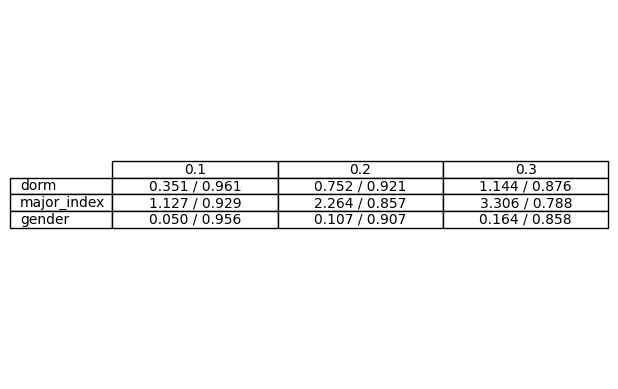

<Figure size 640x480 with 0 Axes>

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, mean_absolute_error

def remove_node_attributes(G, attribute, percentage):
    nodes = list(G.nodes())
    num_nodes_to_remove = int(percentage * len(nodes))
    nodes_with_removed_attr = random.sample(nodes, num_nodes_to_remove)

    for node in nodes_with_removed_attr:
        G.nodes[node][attribute] = None

    return G

def recover_with_label_propagation(G, attribute):

    def label_propagation(G, labels):

        for node in G.nodes():
            if G.nodes[node][attribute] is None:
                neighbor_labels = [G.nodes[n][attribute] for n in G.neighbors(node) if G.nodes[n][attribute] is not None]
                if neighbor_labels:
                    most_common = max(set(neighbor_labels), key=neighbor_labels.count)
                    labels[node] = most_common
        return labels

    labels = {node: G.nodes[node][attribute] for node in G.nodes()}
    propagated_labels = label_propagation(G, labels)

    nx.set_node_attributes(G, propagated_labels, attribute)

    return G

def calculate_accuracy(original_labels, predicted_labels):

    y_true = [original_labels[node] for node in predicted_labels if original_labels[node] is not None]
    y_pred = [predicted_labels[node] for node in predicted_labels if original_labels[node] is not None]
    return accuracy_score(y_true, y_pred)

G = nx.read_gml('/content/drive/MyDrive/fb100/data/Harvard1.gml')

attributes = ['dorm', 'major_index', 'gender']
fractions = [0.1, 0.2, 0.3]

results = pd.DataFrame(index=attributes, columns=fractions)

for attribute in attributes:
    original_labels = {node: G.nodes[node][attribute] for node in G.nodes()}
    for fraction in fractions:
        G_mod = remove_node_attributes(G.copy(), attribute, fraction)
        G_recovered = recover_with_label_propagation(G_mod, attribute)
        recovered_labels = {node: G_recovered.nodes[node][attribute] for node in G_recovered.nodes() if G_recovered.nodes[node][attribute] is not None}

        filtered_original_labels = {node: label for node, label in original_labels.items() if node in recovered_labels}

        acc = calculate_accuracy(filtered_original_labels, recovered_labels)
        mae = mean_absolute_error(list(filtered_original_labels.values()), list(recovered_labels.values()))

        results.at[attribute, fraction] = f"{mae:.3f} / {acc:.3f}"

fig, ax = plt.subplots()
ax.axis('off')
table_data = [[results.at[row, col] for col in results.columns] for row in results.index]
table = ax.table(cellText=table_data, rowLabels=results.index, colLabels=results.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.show()

plt.savefig('label_propagation_results.png')

(e):

The network we choose the Harvard University.

From the data, we can observe that the accuracy of the label propagation algorithm varies significantly across different attributes. Here are potential reasons for the differences in accuracy:

Nature of the Attribute: The  attribute likely exhibits high assortativity in the network since students living in the same dorm are more likely to be friends. This can lead to higher accuracy in label propagation due to the clustering effect where nodes in the same community (dorm) tend to have the same label.dorm

Complexity and Diversity: Attributes like  may have a larger number of unique values and less clear community structure, making it harder for the label propagation algorithm to accurately infer the missing labels. The diversity and cross-linking between students of different majors may reduce the algorithm's ability to accurately propagate labels.major_index

Binary vs. Multiclass: The  attribute typically has fewer classes (often binary: male, female), which may simplify the label prediction task and could lead to higher accuracies if there's any tendency for gender homophily in the network.gender


Question 6:

(a):
How do major fields of study influence the formation of communities within the Facebook100 social network at Harvard University?

The hypothesis is that students tend to form communities based on their major field of study. This is based on the assumption that students within the same academic discipline are more likely to take classes together, participate in the same extracurricular activities, and have shared academic interests, which could lead to stronger and more numerous connections among them.


(b):
To validate this hypothesis, we can use community detection algorithms to identify communities within the network and then analyze the distribution of majors within these communities. If the hypothesis holds, we would expect to find that communities detected in the network disproportionately consist of students with the same or similar majors.

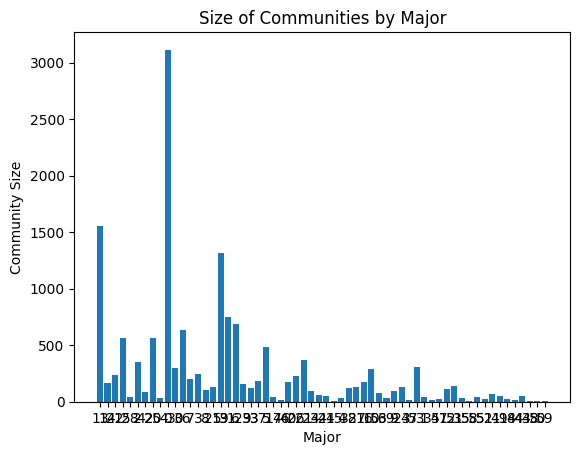

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from collections import defaultdict

G = nx.read_gml('/content/drive/MyDrive/fb100/data/Harvard1.gml')

communities = community.greedy_modularity_communities(G)

major_distribution = defaultdict(list)
for com in communities:
    for node in com:
        major = G.nodes[node]['major_index']
        major_distribution[major].append(node)

major_sizes = {major: len(nodes) for major, nodes in major_distribution.items()}
plt.bar(range(len(major_sizes)), list(major_sizes.values()), tick_label=list(major_sizes.keys()))
plt.xlabel('Major')
plt.ylabel('Community Size')
plt.title('Size of Communities by Major')
plt.show()

homogeneity_scores = {}

for major, score in homogeneity_scores.items():
    print(f'Major: {major}, Homogeneity Score: {score}')

(c):
Variability in Community Size: If the bar chart shows considerable variability in community sizes across different majors, it indicates that certain fields of study have more cohesive or larger groups than others.

Dominant Communities: The tallest bars represent the majors with the largest communities. If these majors are not simply the most populous ones, it suggests that students within these fields of study may have more in common or more reasons to interact, leading to denser community formation.

Less Cohesive Majors: Shorter bars represent smaller communities associated with specific majors. These could be less popular majors or ones where students have more diverse interests and social ties that extend beyond their field of study.

Overall Trends: If the chart generally shows that community sizes decrease as the major index increases, it might suggest that earlier-listed majors (which could correspond to more common or core academic disciplines) have a stronger tendency to form communities.

Concluding on the hypothesis:

If the majors with larger communities correlate with those that are more academically or socially interactive (based on the university's academic structure and student life), this would support the hypothesis that students form communities based on their major field of study.

If there's no clear pattern or if community sizes are relatively even across majors, it would suggest that factors other than majors are more influential in community formation, which would not support the hypothesis.

If the largest communities correspond to the most popular majors (by enrollment numbers), this might not necessarily confirm the hypothesis. It could merely reflect the larger number of potential connections rather than a propensity for students of the same major to form a community.

To make a more robust conclusion, it would be essential to compare the actual enrollment numbers per major with the community sizes and perform a statistical analysis to see if the distribution of community sizes is significantly different from what random chance would predict. Additionally, further investigation could consider other potential factors influencing community formation, such as residential living, year of study, or extracurricular activities.